<a href="https://colab.research.google.com/github/ryanmcmanamon1/computational_physics/blob/main/Copy_of_Ryan_McManamon_Lab07_Integration_ipynb_on_2025_03_24_18_36_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [ ]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt
import math as math


# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [ ]:
# write your function here
def trap(y,x):
  '''
  inputs: x, y arrays

  function calulctae area under curve using trapezoid method

  outputs: area
  '''
  Atotal = 0
  for i in range(1,len(x)):
    A = (1/2)*(y[i]+y[i-1])*(x[i]-x[i-1])
    Atotal = Atotal + A
  return Atotal


# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [ ]:
# write your function mycircle here
def mycircle(x,r=2):
  '''
  inputs: x array, optional radius with default argument of 2

  function calculates the y value for x using the function y=sqrt(4-x^2)

  outputs: y
  '''
  y = (np.sqrt(r**2-x**2))
  return y


### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [ ]:
xvals = np.linspace(-2,2,100)
yvals = mycircle(xvals,r=2)
A = trap(yvals,xvals)
print(f'Area = {A}')

Area = 6.276436078403621


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [ ]:
print(math.isclose(A,2*np.pi,abs_tol = 1e-2))
percenterror = ((A-2*np.pi)/2*np.pi)*100
print(f'Percent errror = {percenterror}')

True
Percent errror = -1.0601663769984864


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [ ]:
xvals1000 = np.linspace(-2,2,1000)
yvals1000 = mycircle(xvals1000,r=2)
A1000 = trap(yvals1000,xvals1000)
print(f'Area = {A1000}')
print(math.isclose(A1000,2*np.pi,abs_tol = 1e-2))
percenterror1000 = ((A1000-2*np.pi)/2*np.pi)*100
print(f'Percent error = {percenterror1000}')

#As the step size of x increases the accuracy of A increases

Area = 6.28297463809257
True
Percent error = -0.03309182280540579


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [ ]:
def mygauss(x,mean,sigma):
  '''
  inputs: x array, mean , sigma

  function caluclated the value of the gaussian function for x

  outputs: gaussian y value
  '''
  y = 1/(np.sqrt(2*np.pi)*sigma)*np.exp((-1/2)*((x-mean)/sigma)**2)
  return y

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [ ]:
sigma = 1
x = np.linspace(-sigma,sigma,1000)
mean = 0
y = mygauss(x,mean,sigma)
A = trap(y,x)
print(A)

0.6826893305001367


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [ ]:
x2 = np.linspace(-2*sigma,2*sigma,1000)
y2 = mygauss(x2,mean,sigma)
A2  = trap(y2,x2)
print(A2)

0.9544994475751292


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [ ]:
x3 = np.linspace(-3*sigma,3*sigma,1000)
y3 = mygauss(x3,mean,sigma)
A3  = trap(y3,x3)
print(A3)

0.9973001240039716


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [ ]:
# import scipy.integrate.trapezoid
import scipy.integrate

# set up x and y arrays for the half circle
x = np.linspace(-2,2,100)
y = mycircle(x,r=2)
# call scipy.integrate.trapezoid to perform the integration
Area = scipy.integrate.trapezoid(y,x)
# print your result and the expected answer in a formatted print statement
print(f'The area using the built in integration method is {Area}')

The area using the built in integration method is 6.276436078403619


In [ ]:
# import scipy.integrate.trapezoid

# set up x and y arrays for the gaussian
sigma = 1
xgauss = np.linspace(-sigma,sigma,1000)
mean = 0
ygauss = mygauss(xgauss,mean,sigma)
# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
Areagauss = scipy.integrate.trapezoid(ygauss,xgauss)
# print your result and the expected answer in a formatted print statement
print(f'The area using the built in integration method is {Areagauss}')

The area using the built in integration method is 0.6826893305001358


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [ ]:
# your monte carlo function here
def mcintegrate(x,y,npoints,visualize=False):
  '''
  inputs: x array, y array, number of random points, optional visualize argument

  function plots random points of x and y and color codes them based on if they
  are under or above the curve y=sqrt(4-x^2). Based on the ratio of total points
  to points under the curve, the area under the curve can be caclulated.

  outputs: area under the curve
  '''
  xmin = np.min(x)
  xmax = np.max(x)
  ymin = np.min(y)
  ymax = np.max(y)
  xpoints = np.random.uniform(low=xmin,high=xmax,size=npoints)
  ypoints = np.random.uniform(low=ymin,high=ymax,size=npoints)
  goodflag = (ypoints < mycircle(xpoints))
  Ngood = np.sum(ypoints < mycircle(xpoints))
  Ntotal = len(xpoints)
  Integral = (Ngood/Ntotal)*(xmax-xmin)*(ymax-ymin)
  if visualize:
    plt.figure()
    plt.plot(x,mycircle(x),'k',label='y=sqrt(4-x^2)')
    plt.plot(xpoints[goodflag],ypoints[goodflag],'bo',label='good')
    plt.plot(xpoints[~goodflag],ypoints[~goodflag],'ro',label='bad')
    plt.title(f'Area of the graph is {Integral}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
  return Integral


### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

np.float64(6.128)

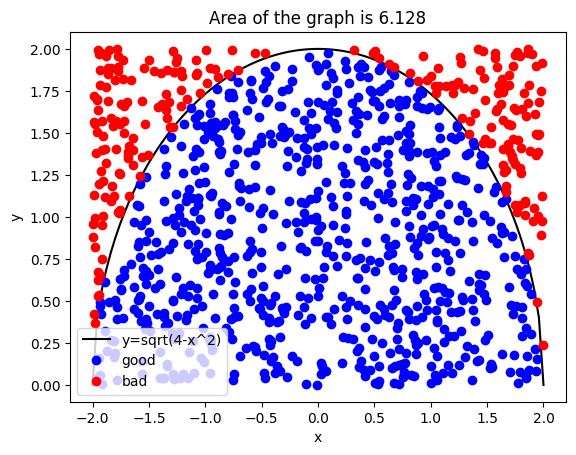

In [ ]:
# your code to calculate the area of a half circle using monte carlo
x = np.linspace(-2,2,100)
y = np.linspace(0,2,100)
npoints=1000

#used n = 1000 so the curve is still visable in black. for higher n the points
#cover the line

mcintegrate(x,y,npoints,visualize=True)